<a href="https://colab.research.google.com/github/panchaltanvi/Hackathon_mind-coders/blob/main/dataset_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split
from shutil import copyfile, rmtree


src_dir = "/content/drive/MyDrive/College/Minor/LY_Deep_learning_2023/DL_project/Dataset_vessel_images/Vertical_pressure_vessels"
fin_dir = "/content/drive/MyDrive/College/Minor/LY_Deep_learning_2023/DL_project/Dataset_vessel_images/Dataset"

file_List = os.listdir(src_dir)

for img in file_List:
    file_path = os.path.join(src_dir, img)
    if os.path.isfile(file_path):
        """if img.lower().endswith((".jpeg", ".jpg")):
            continue"""
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        img_resized = rgb_im.resize((256, 256),Image.ANTIALIAS).filter(ImageFilter.DETAIL)
        orgnl_ext = os.path.splitext(img)[1].lower()
        conv_img = file_path.replace(orgnl_ext, "_conv.jpg")
        img_resized.save(conv_img, quality=100, subsampling=0)
        os.remove(file_path)


<ipython-input-12-825b4e8ec246>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = rgb_im.resize((256, 256),Image.ANTIALIAS).filter(ImageFilter.DETAIL)


In [ ]:
train_set = os.path.join(fin_dir, "train/Vertical_Pressure_Vessel")
test_set = os.path.join(fin_dir, "test/Vertical_Pressure_Vessel")

for marker in [train_set, test_set]:
    if os.path.exists(marker):
        rmtree(marker)

os.makedirs(train_set, exist_ok=True)
os.makedirs(test_set, exist_ok=True)

fileList = [filename for filename in os.listdir(src_dir) if filename.lower().endswith((".jpeg", ".jpg"))]

train_files, test_files = train_test_split(fileList, test_size=0.1, random_state=42)

for filename in train_files:
    src_path = os.path.join(src_dir, filename)
    dst_path = os.path.join(train_set, filename)
    copyfile(src_path, dst_path)

for filename in test_files:
    src_path = os.path.join(src_dir, filename)
    dst_path = os.path.join(test_set, filename)
    copyfile(src_path, dst_path)

print("Dataset creation complete.")

Dataset creation complete.


Total Number of Images in the dataset: 50


Text(0, 0.5, 'Height')

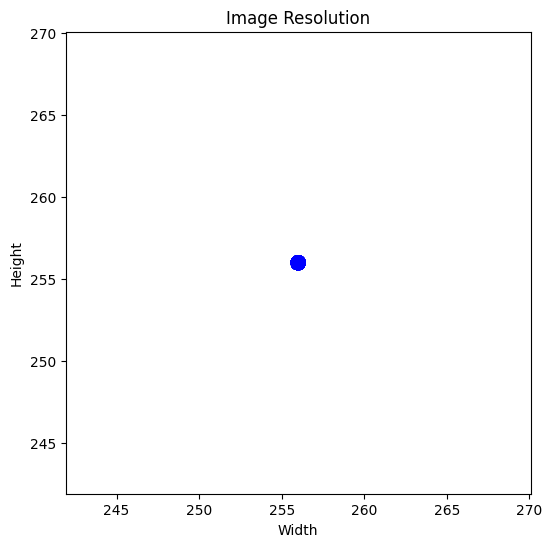

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import imagesize
import numpy as np

root = "/content/drive/MyDrive/College/Minor/LY_Deep_learning_2023/DL_project/Dataset_vessel_images/Horizontal_Pressure_Vessels"

# Get the Image Resolutions
imgs = [img.name for img in Path(root).iterdir() if img.suffix.lower() in {".jpg", ".jpeg"}]
img_meta = {}

for f in imgs:
    img_path = Path(root) / f
    width, height = imagesize.get(img_path)
    img_meta[str(f)] = {"Width": width, "Height": height}
# Convert it to DataFrame and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict(img_meta, orient='index').reset_index()
img_meta_df.columns = ['FileName', 'Width', 'Height']
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)
print(f'Total Number of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()
# Visualize Image Resolutions
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=1, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=10)
ax.set_ylabel("Height", size=10)